In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib notebook

In [4]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Preeya null dynamics models: 
data_path = r'D:\Dropbox\BMI_co_obs_paper\data\null_dynamics_models\null_dynamics_models.pkl'
#print(os.path.exists(data_path))
dn_dyn_dic = pickle.load(open(data_path))

#Compare to original dynamics and decoders: 
save_home = r'D:\DATA\bmi_co_obs_backup'

dynamics_dir = r'D:\Dropbox\BMI_co_obs_paper\data'
dynamics_path = os.path.join(dynamics_dir, 'dynamics_for_v.pkl')
with open(dynamics_path, 'rb') as f: 
    dynamics_dic = pickle.load(f)

decoder_dir = r'D:\Dropbox\BMI_co_obs_paper\data'
decoder_path = os.path.join(decoder_dir, 'decoders_for_v.pkl')
with open(decoder_path, 'rb') as f: 
    decoder_dic = pickle.load(f)
    
a_list = ['grom', 'jeev']
a2num_days = {'grom':9, 'jeev':4}

In [35]:
a = 'grom'
d = 0

In [36]:
#Decoder null dynamics
A_dn = np.mat(test[a,d].coef_)
print(A_dn.shape)
b_dn = np.mat(test[a,d].intercept_[:, np.newaxis])
print(b_dn.shape)

(44L, 44L)
(44L, 1L)


In [39]:
#Full dynamics:
A = dynamics_dic[a, d, 'A']
print(A.shape)
b = dynamics_dic[a, d, 'b'][:, np.newaxis]
print(b.shape)

(44L, 44L)
(44L, 1L)


In [18]:
dynamics_dic.keys()

[('grom', 8, 'b'),
 ('jeev', 2, 'b'),
 ('jeev', 1, 'b'),
 ('grom', 4, 'b'),
 ('grom', 5, 'b'),
 ('grom', 2, 'b'),
 ('grom', 5, 'A'),
 ('grom', 2, 'A'),
 ('grom', 1, 'A'),
 ('jeev', 3, 'A'),
 ('grom', 1, 'b'),
 ('grom', 7, 'b'),
 ('jeev', 0, 'b'),
 ('grom', 0, 'b'),
 ('grom', 0, 'A'),
 ('jeev', 0, 'A'),
 ('grom', 6, 'b'),
 ('grom', 8, 'A'),
 ('jeev', 3, 'b'),
 ('grom', 7, 'A'),
 ('grom', 3, 'A'),
 ('jeev', 1, 'A'),
 ('grom', 6, 'A'),
 ('grom', 3, 'b'),
 ('jeev', 2, 'A'),
 ('grom', 4, 'A')]

In [41]:
#Decoder projections
decoder_rank = 2
mat = decoder_dic[a,d,'KG'].T
u,s,vh = np.linalg.svd(mat)
decoder_space = np.mat(u[:,:decoder_rank])
decoder_proj = decoder_space*decoder_space.T#np.matmul(decoder_space, decoder_space.T)

decoder_null_space = u[:,decoder_rank:]
decoder_null_proj = np.eye(decoder_proj.shape[0])-decoder_proj

<IPython.core.display.Javascript object>


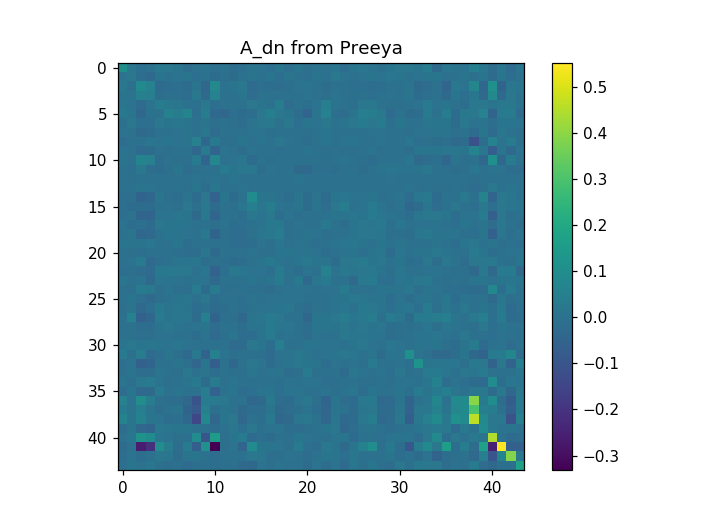

<IPython.core.display.Javascript object>


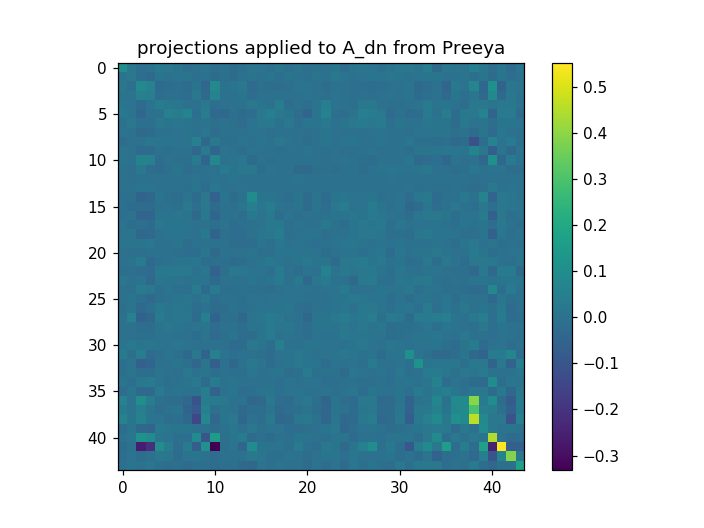

True
True


In [42]:
#Test that A_dn from preeya is unchanged if we project inputs and outputs into null space

A_dn_proj = decoder_null_proj*A_dn*decoder_null_proj #np.dot(np.dot(decoder_null_proj, A_dn), decoder_null_proj)
b_dn_proj = decoder_null_proj*b_dn

plt.figure()
plt.imshow(A_dn)
plt.colorbar()
plt.title('A_dn from Preeya')

plt.figure()
plt.imshow(A_dn_proj)
plt.colorbar()
plt.title('projections applied to A_dn from Preeya')

print(np.allclose(A_dn, A_dn_proj))
print(np.allclose(b_dn, b_dn_proj))

<IPython.core.display.Javascript object>


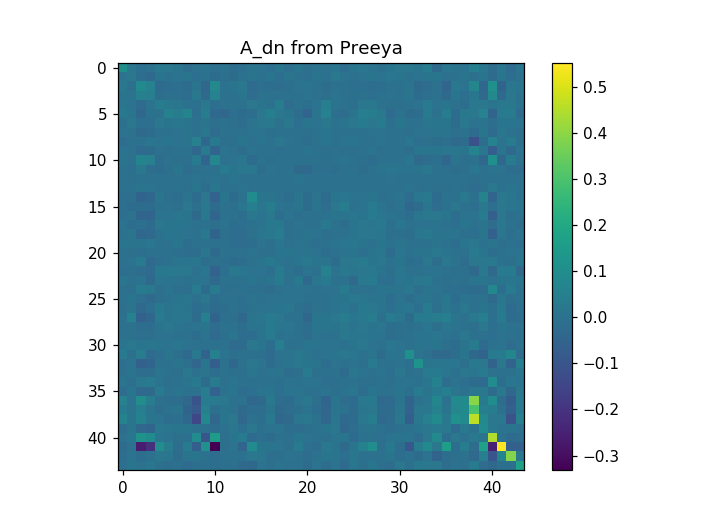

<IPython.core.display.Javascript object>


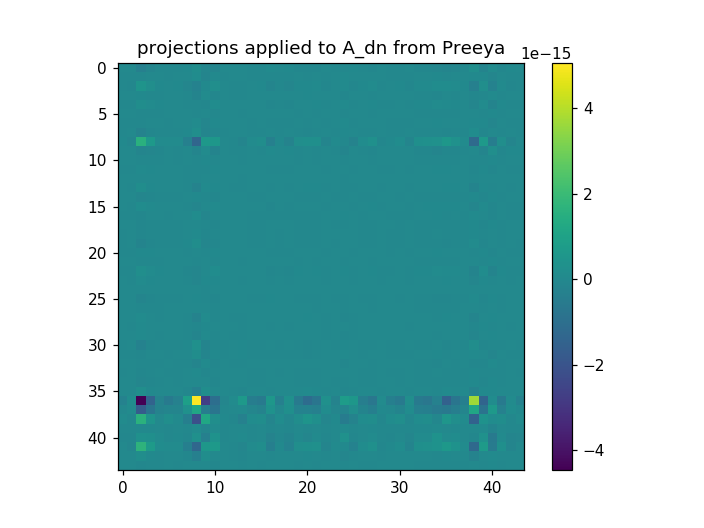

False
False


In [44]:
#Test that A_dn from preeya is destroed with decoder proj

A_dn_proj = A_dn*decoder_proj #decoder_proj*A_dn 
b_dn_proj = decoder_proj*b_dn

plt.figure()
plt.imshow(A_dn)
plt.colorbar()
plt.title('A_dn from Preeya')

plt.figure()
plt.imshow(A_dn_proj)
plt.colorbar()
plt.title('projections applied to A_dn from Preeya')

print(np.allclose(A_dn, A_dn_proj))
print(np.allclose(b_dn, b_dn_proj))

In [21]:
A_dn_hat = decoder_null_proj*A*decoder_null_proj

In [22]:
np.linalg.matrix_rank(decoder_proj)

2

In [23]:
np.linalg.matrix_rank(decoder_proj*np.mat(A))

2

In [24]:
np.linalg.matrix_rank(decoder_null_proj*np.mat(A))

18

In [25]:
np.linalg.matrix_rank(A_dn)

18

In [26]:
np.linalg.matrix_rank(decoder_null_proj*A_dn)

18

In [27]:
np.linalg.matrix_rank(decoder_proj*A_dn)

20

In [28]:
A_dn.shape

(20L, 20L)

In [100]:
u,s,vh = np.linalg.svd(decoder_proj*A_dn.T)
print(np.allclose(s, 0))
print(s)

True
[6.24135112e-15 4.60948956e-15 2.90469943e-17 1.85995236e-17
 1.72630562e-17 1.22010695e-17 8.18155318e-18 8.11150557e-18
 5.74137357e-18 3.84824287e-18 2.98965014e-18 2.66426154e-18
 1.66828439e-18 1.22712960e-18 9.13316773e-19 7.04669961e-19
 4.18831614e-19 3.86258797e-19 2.41847203e-19 5.36114776e-20]


<IPython.core.display.Javascript object>


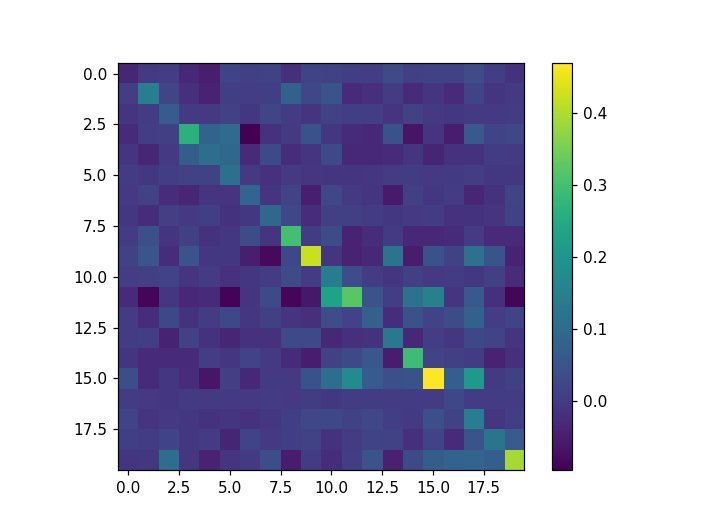

<IPython.core.display.Javascript object>


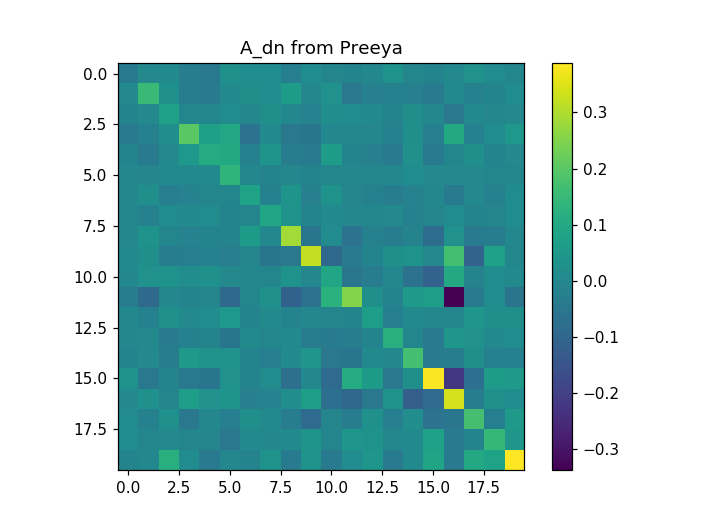

<IPython.core.display.Javascript object>


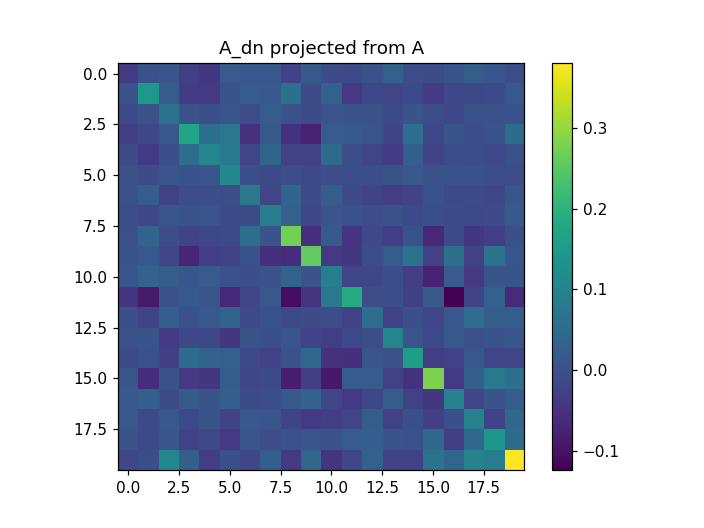

Text(0.5,1,'A_dn projected from A')

In [29]:
plt.figure()
plt.imshow(A)
plt.colorbar()

plt.figure()
plt.imshow(A_dn)
plt.colorbar()
plt.title('A_dn from Preeya')

plt.figure()
plt.imshow(A_dn_hat)
plt.colorbar()
plt.title('A_dn projected from A')


In [94]:
a

'jeev'

In [95]:
d

0

In [108]:
test = decoder_proj*A_dn*decoder_proj

In [110]:
np.max(test)

3.0272344880585607e-16

<IPython.core.display.Javascript object>


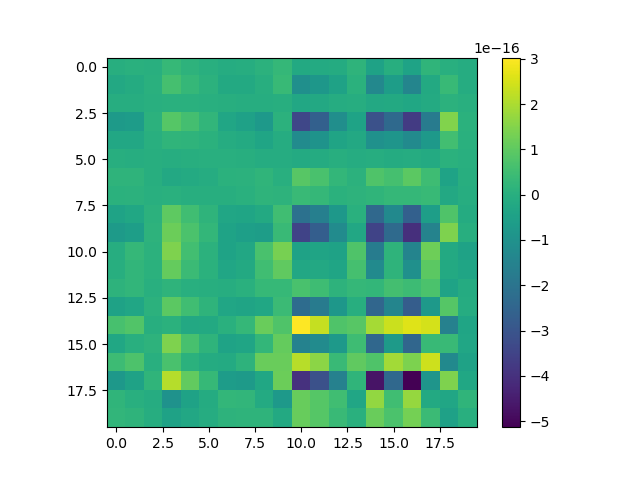

In [109]:
plt.figure()
plt.imshow(test)
plt.colorbar()

In [111]:
b_dn

matrix([[ 1.09921862],
        [ 0.22953067],
        [ 0.09221866],
        [ 0.53148058],
        [ 0.72481312],
        [ 0.0801684 ],
        [ 0.6159172 ],
        [ 0.2722704 ],
        [ 0.12594929],
        [ 0.3284675 ],
        [-0.31049783],
        [ 0.75513378],
        [ 0.29551192],
        [ 0.00312251],
        [ 0.30212707],
        [-0.0345545 ],
        [-0.20331643],
        [-0.52506202],
        [ 0.51246222],
        [ 0.48625002]])

In [112]:
b_dn.shape

(20L, 1L)

In [113]:
decoder_proj*b_dn

matrix([[-3.12250226e-17],
        [ 0.00000000e+00],
        [ 1.12757026e-17],
        [ 1.45716772e-16],
        [ 5.89805982e-17],
        [ 1.56125113e-17],
        [-3.98986399e-17],
        [-2.77555756e-17],
        [ 4.16333634e-17],
        [ 6.24500451e-17],
        [-1.38777878e-16],
        [-1.11022302e-16],
        [-6.93889390e-17],
        [ 4.16333634e-17],
        [-1.94289029e-16],
        [-6.24500451e-17],
        [-2.35922393e-16],
        [-1.38777878e-17],
        [ 4.85722573e-17],
        [-3.12250226e-17]])